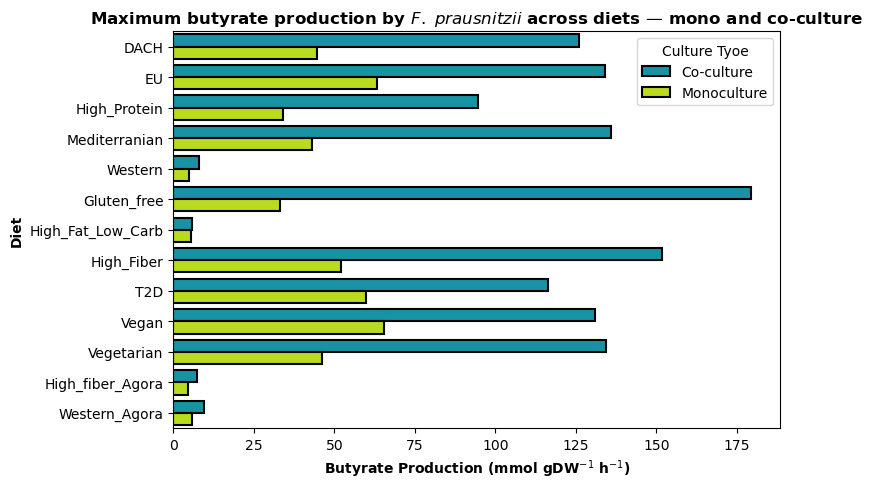

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("/Volumes/Mac Local/IITM/PhD/Coursework Sem 2/CSB/Project/Data1.xlsx")

# Reshape the data for a stacked bar plot
data_melted = data.melt(id_vars='Diet', value_vars=['Co-culture', 'Monoculture'],
                        var_name='Culture Type', value_name='Value')




# Create the stacked bar plot
plt.figure(figsize=(8, 5))
#plt.xticks(rotation=45, ha='right')  # Rotates labels 45° and aligns them to the right
data['Diet'] = data['Diet'].apply(lambda x: '\n'.join(x.split()))  # Wraps long text

#sns.barplot(x='Diet', y='Value', hue='Culture Type', data=data_melted)



custom_palette = {'Co-culture': '#9B59B6',  # Purple
                  'Monoculture': '#F48FB1'}  # Light Blue
ax =sns.barplot(y='Diet', x='Value', hue='Culture Type', data=data_melted,  palette='nipy_spectral')



# Add outlines to each bar
for bar in ax.patches:
    bar.set_edgecolor('black')    # Outline color
    bar.set_linewidth(1.5)        # Outline thickness



# Add labels and title
plt.xlabel('Butyrate Production (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=10, fontweight='bold')
plt.ylabel('Diet', fontsize=10, fontweight='bold')
plt.title(r'Maximum butyrate production by $\mathit{F.\ prausnitzii}$ across diets — mono and co-culture', fontsize=12, fontweight='bold')
plt.legend(title='Culture Tyoe')

plt.tight_layout()
plt.savefig('Butyrate_production_across_diets.png')

plt.show()



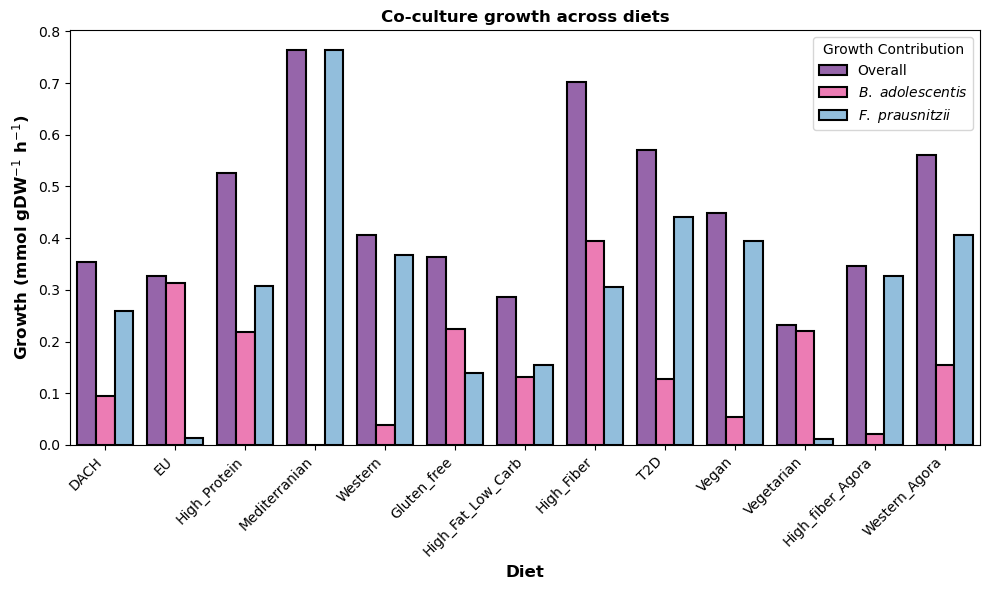

<Figure size 640x480 with 0 Axes>

In [29]:
file_path = "/Volumes/Mac Local/IITM/PhD/Coursework Sem 2/CSB/Project/Data1.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet2')

data_melted = data.melt(id_vars='Diet', 
                        value_vars=['Growth_overall', 'Growth_B.adolescentis', 'Growth_F.prausnitzii'],
                        var_name='Growth Type', value_name='Value')

# Replace growth type names for prettier labels
data_melted['Growth Type'] = data_melted['Growth Type'].replace({
    'Growth_overall': 'Overall',
    'Growth_B.adolescentis': r'$\mathit{B.\ adolescentis}$',
    'Growth_F.prausnitzii': r'$\mathit{F.\ prausnitzii}$'
})


# Custom color palette
custom_palette = {
    'Overall': '#9B59B6',   
    r'$\mathit{B.\ adolescentis}$': '#FF69B4',
    r'$\mathit{F.\ prausnitzii}$': '#85C1E9'
}
      # Light Blue

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Diet', y='Value', hue='Growth Type', 
                 data=data_melted, palette=custom_palette)

# Add outlines to each bar
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

# Bold axis labels
plt.xlabel('Diet', fontsize=12, fontweight='bold')
plt.ylabel('Growth (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.title('Co-culture growth across diets', fontsize=12, fontweight='bold')
plt.legend(title='Growth Contribution')
plt.tight_layout()
plt.show()
plt.savefig('Growth_across_diets.png')

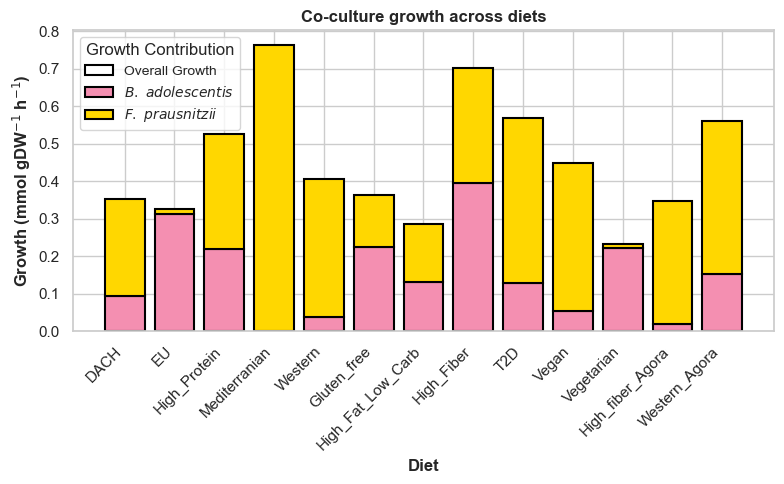

In [ ]:

data = pd.read_excel(file_path, sheet_name='Sheet2')

from matplotlib.patches import Patch


# Plotting
plt.figure(figsize=(8, 5))

# Stacked bars
plt.bar(data['Diet'], data['Growth_B.adolescentis'], 
        label='B.adolescentis', color='#F48FB1', edgecolor='black', linewidth=1.5)

plt.bar(data['Diet'], data['Growth_F.prausnitzii'], 
        bottom=data['Growth_B.adolescentis'], 
        label='F.prausnitzii', color='#FFD700', edgecolor='black', linewidth=1.5)

overall_growth_legend = Patch(facecolor='white', edgecolor='black', linewidth=1.5, label='Overall Growth')
b_adolescentis_legend = Patch(facecolor='#F48FB1', edgecolor='black', linewidth=1.5, label=r'$\mathit{B.\ adolescentis}$')
f_prausnitzii_legend = Patch(facecolor='#FFD700', edgecolor='black', linewidth=1.5, label= r'$\mathit{F.\ prausnitzii}$')


# Add legend with title
plt.legend(handles=[overall_growth_legend, b_adolescentis_legend, f_prausnitzii_legend],
           title='Growth Contribution', title_fontsize=12, fontsize=10)

# Bold axis labels
plt.xlabel('Diet', fontsize=12, fontweight='bold')
plt.ylabel('Growth (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.title('Co-culture growth across diets', fontsize=12, fontweight='bold')
#plt.legend(title='Organism')
plt.tight_layout()
plt.savefig('Co-culture growth across diets.png')
plt.show()

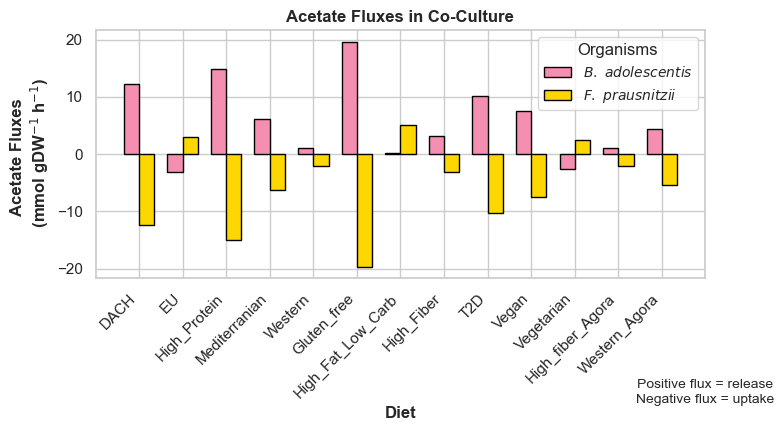

In [ ]:
data = pd.read_excel(file_path, sheet_name='Sheet3')

# Plotting
plt.figure(figsize=(8, 5))

# Bar positions
x = range(len(data['Diet']))

# Bar width
bar_width = 0.35

# Stacked bars for B.adolescentis
plt.bar(x, data['Acetate_flux_B.adolescentis'], 
        width=bar_width, label=r'$\mathit{B.\ adolescentis}$', color='#F48FB1', edgecolor='black')

# Stacked bars for F.prausnitzii
plt.bar([pos + bar_width for pos in x], data['Acetate_flux_F.prausnitzii'], 
        width=bar_width, label= r'$\mathit{F.\ prausnitzii}$', color='#FFD700', edgecolor='black')

# X-axis labels
plt.xticks([pos + bar_width / 2 for pos in x], data['Diet'], rotation=45, ha='right')

# Axis labels and legend
plt.xlabel('Diet', fontsize=12, fontweight='bold')
plt.ylabel('Acetate Fluxes \n (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=12, fontweight='bold')
plt.legend(title='Organisms', title_fontsize=12, fontsize=10)

plt.annotate(
    "Positive flux = release\nNegative flux = uptake",
    xy=(1.0, -0.5),  
    xycoords='axes fraction',  
    fontsize=10, ha='center'
)


plt.title('Acetate Fluxes in Co-Culture', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('Acetate Fluxes in Co-Culture.png')
plt.show()

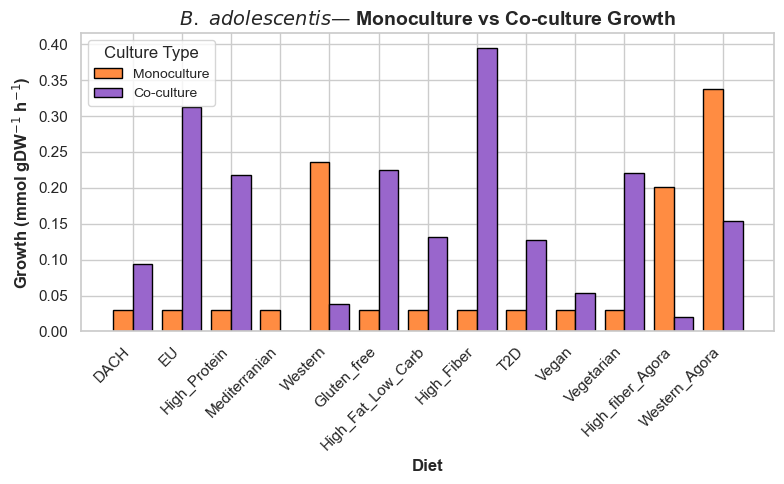

In [41]:
data = pd.read_excel(file_path, sheet_name='Bf')

plt.figure(figsize=(8, 5))
# Define bar positions
x = range(len(data['Diet']))
bar_width = 0.4  # Adjust to create space between the two stacked bars per diet

# Define colors
colors = {'Monoculture': '#FF8C42', 'Co-culture': '#9966CC'}  # Light Blue & Purple

# Plot Monoculture bars
plt.bar([pos - bar_width/2 for pos in x], data['Monoculture'], 
        width=bar_width, label='Monoculture', color=colors['Monoculture'], edgecolor='black')

# Plot Co-culture bars (side by side)
plt.bar([pos + bar_width/2 for pos in x], data['Co-culture'], 
        width=bar_width, label='Co-culture', color=colors['Co-culture'], edgecolor='black')

# X-axis labels
plt.xticks(x, data['Diet'], rotation=45, ha='right')

# Axis labels and title
plt.xlabel('Diet', fontsize=12, fontweight='bold')
plt.ylabel('Growth (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=12, fontweight='bold')
plt.title(r'$\mathit{B.\ adolescentis}$— Monoculture vs Co-culture Growth', fontsize=14, fontweight='bold')

# Legend

plt.legend(title='Culture Type', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

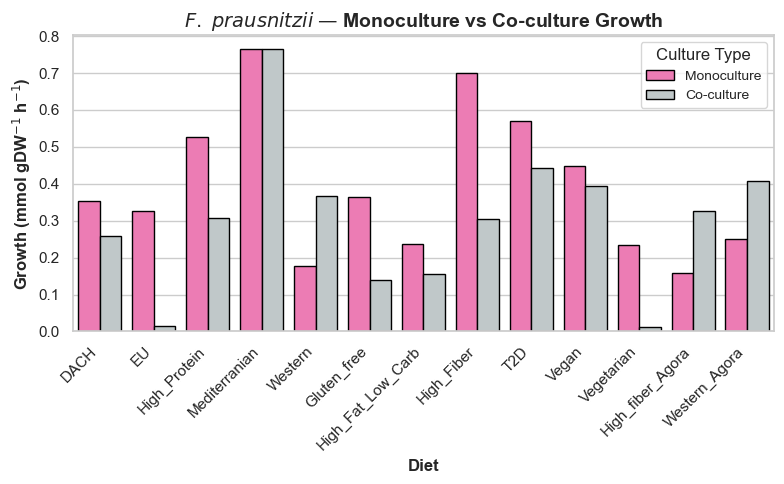

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel(file_path, sheet_name='Fp')

# Melt the data to prepare for Seaborn plotting
data_melted = data.melt(id_vars='Diet', 
                        value_vars=['Monoculture', 'Co-culture'], 
                        var_name='Culture_Type', 
                        value_name='Growth')

# Define custom color palette
palette = {'Monoculture': '#FF69B4', 'Co-culture': '#BFC9CA'}

# Set Seaborn theme for a cleaner look
sns.set_theme(style='whitegrid')

# Plotting with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=data_melted, x='Diet', y='Growth', hue='Culture_Type', 
            palette=palette, dodge=True, edgecolor='black')

# Customize labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Diet', fontsize=12, fontweight='bold')
plt.ylabel('Growth (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=12, fontweight='bold')
plt.title(r'$\mathit{F.\ prausnitzii}$ — Monoculture vs Co-culture Growth', fontsize=14, fontweight='bold')

# Customize legend
plt.legend(title='Culture Type', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()


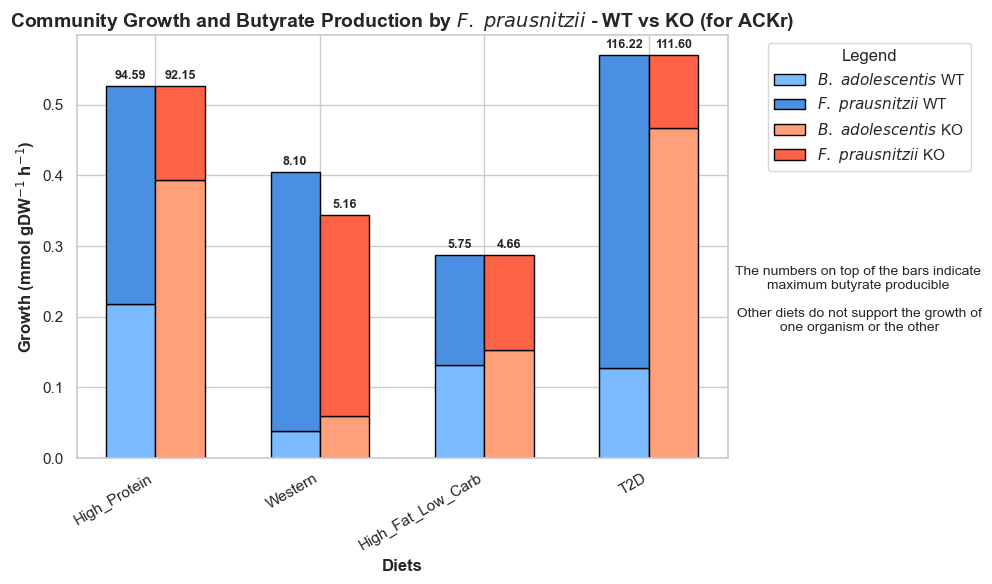

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data
data = pd.read_excel(file_path, sheet_name='Sheet8')

# Seaborn style
sns.set(style='whitegrid')

# Bar positions
x = np.arange(len(data['Diet']))  
bar_width = 0.3  

# Create figure
plt.figure(figsize=(10, 6))

# WT Stacked Bar
plt.bar(x, data['Growth_B.adolescentis_WT'], label=r'$\mathit{B.\ adolescentis}$ WT', color='#7BBAFF', width=bar_width,edgecolor='black')
plt.bar(x, data['Growth_F.prausnitzii_WT'], 
        bottom=data['Growth_B.adolescentis_WT'], label=r'$\mathit{F.\ prausnitzii}$ WT', color='#4A90E2', width=bar_width,edgecolor='black')

# KO Stacked Bar
plt.bar(x + bar_width, data['Growth_B.adolescentis_KO'], 
        label=r'$\mathit{B.\ adolescentis}$ KO', color='#FFA07A', width=bar_width,edgecolor='black')
plt.bar(x + bar_width, data['Growth_F.prausnitzii_KO'], 
        bottom=data['Growth_B.adolescentis_KO'], label= r'$\mathit{F.\ prausnitzii}$ KO', 
        color='#FF6347', width=bar_width,edgecolor='black')

# Adding Butyrate Values with Better Positioning
for idx, row in data.iterrows():
    plt.text(x[idx], row['Growth_overall_WT'] + 0.01, f"{row['Butyrate_WT']:.2f}", 
             ha='center', fontsize=9, fontweight='bold')
    plt.text(x[idx] + bar_width, row['Growth_overall_KO'] + 0.01, f"{row['Butyrate_KO']:.2f}", 
             ha='center', fontsize=9, fontweight='bold')

# Customization
plt.ylabel('Growth (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=12, fontweight='bold')
plt.xlabel('Diets', fontsize=12, fontweight='bold')
plt.title(r'Community Growth and Butyrate Production by $\mathit{F.\ prausnitzii}$ - WT vs KO (for ACKr)', fontsize=14, fontweight='bold')
plt.xticks(x + bar_width / 2, data['Diet'], rotation=30, ha='right')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.annotate(
    "The numbers on top of the bars indicate\nmaximum butyrate producible\n\n Other diets do not support the growth of\n one organism or the other",
    xy=(1.2, 0.3),  
    xycoords='axes fraction',  
    fontsize=10, ha='center'
)
plt.show()


Index(['Reaction Name', 'Gluten-free', 'High Fiber'], dtype='object')


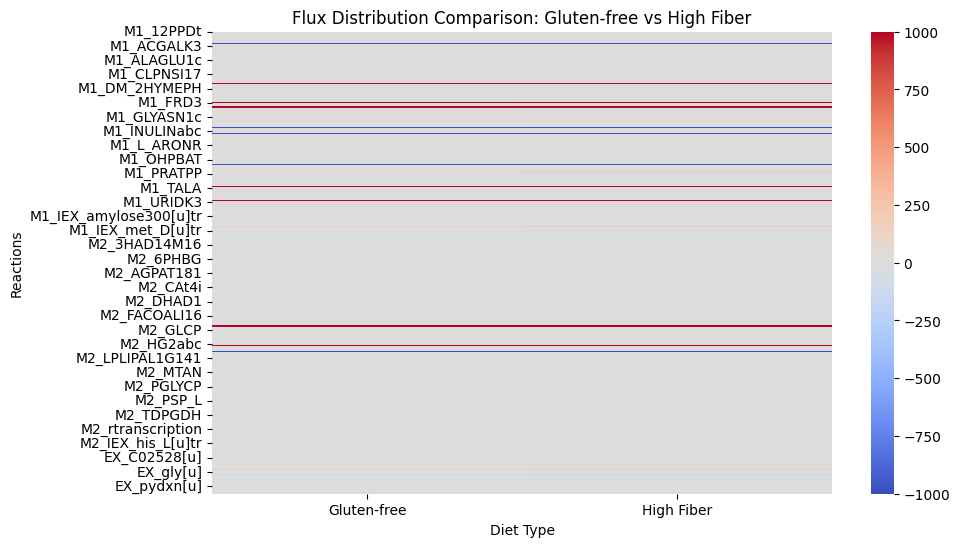

In [ ]:



df = pd.read_excel(file_path,sheet_name ="Sheet4" )
print(df.columns)

# Set the Reaction Name as the index for better visualization
df.set_index('Reaction Name', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap='coolwarm', cbar=True, fmt=".2f")

# Add labels and title
plt.title('Flux Distribution Comparison: Gluten-free vs High Fiber')
plt.xlabel('Diet Type')
plt.ylabel('Reactions')

plt.show()

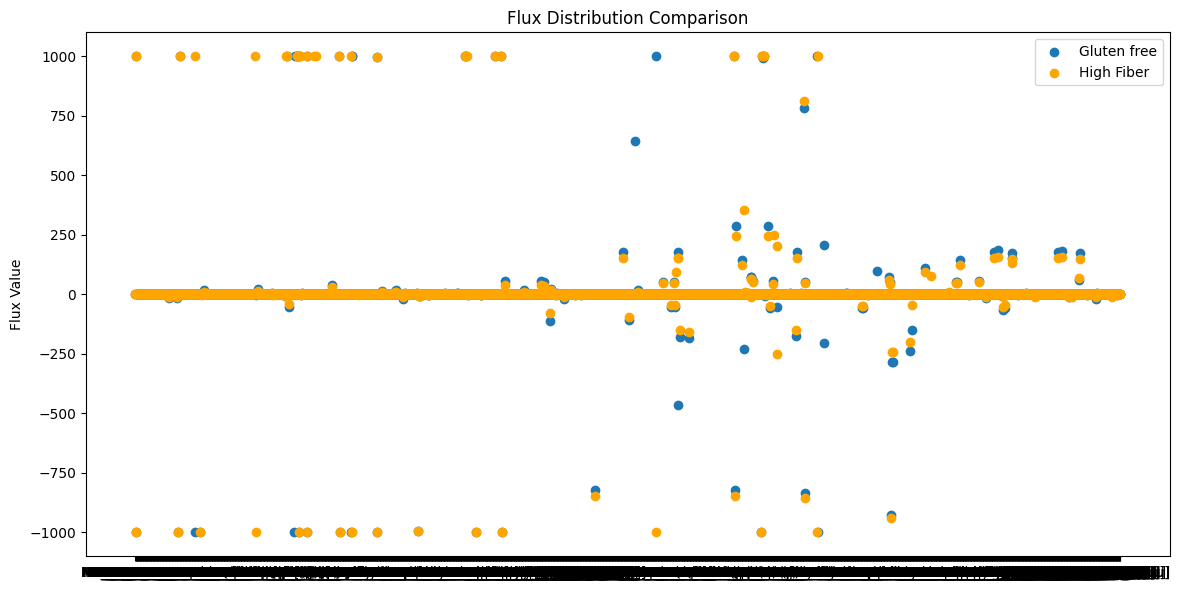

In [35]:



# Load data from Excel
file_path = "/Volumes/Mac Local/IITM/PhD/Coursework Sem 2/CSB/Project/Data.xlsx"

df = pd.read_excel(file_path,sheet_name ="Sheet4" )


plt.figure(figsize=(12, 6))

# Line plot for each diet
plt.scatter( df['Reaction Name'],df['Gluten free'], label='Gluten free', marker='o')
plt.scatter(df['Reaction Name'],df['High fiber'], label='High Fiber', marker='o', color ='orange')

# Enhancing the plot
#plt.xticks(rotation=45, ha='right')
plt.ylabel('Flux Value')
plt.title('Flux Distribution Comparison')
plt.legend()
plt.tight_layout()

plt.show()

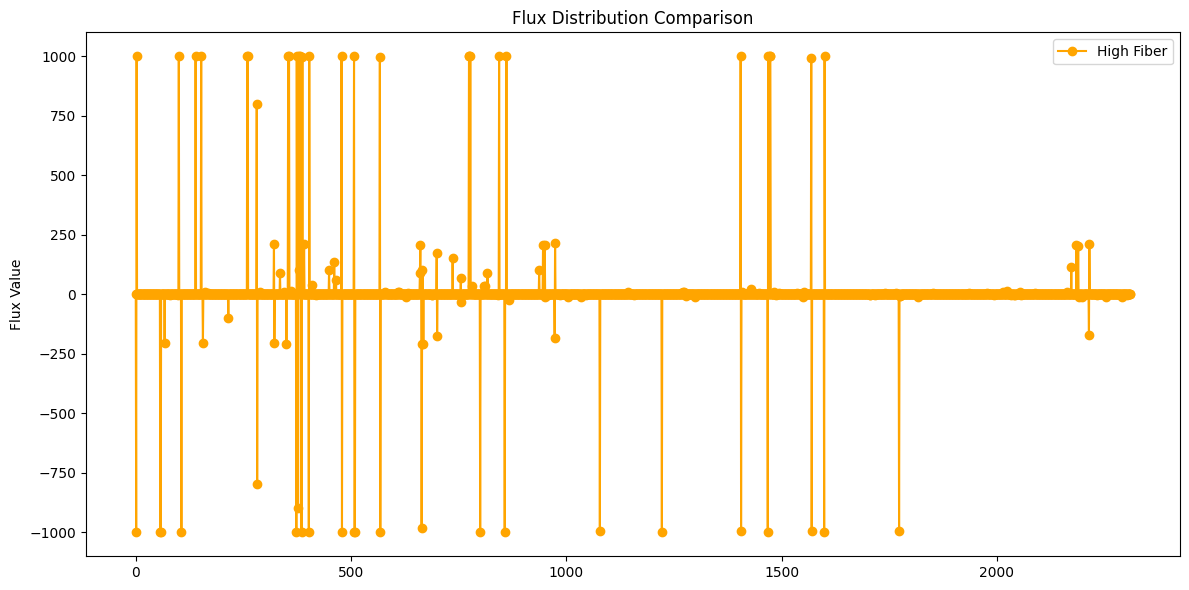

In [23]:



# Load data from Excel
file_path = "/Volumes/Mac Local/IITM/PhD/Coursework Sem 2/CSB/Project/Data.xlsx"

df = pd.read_excel(file_path,sheet_name ="Sheet4" )


plt.figure(figsize=(12, 6))

# Line plot for each diet

plt.plot(df['High Fiber'], label='High Fiber', marker='o', color ='orange')

# Enhancing the plot
#plt.xticks(rotation=45, ha='right')
plt.ylabel('Flux Value')
plt.title('Flux Distribution Comparison')
plt.legend()
plt.tight_layout()

plt.show()

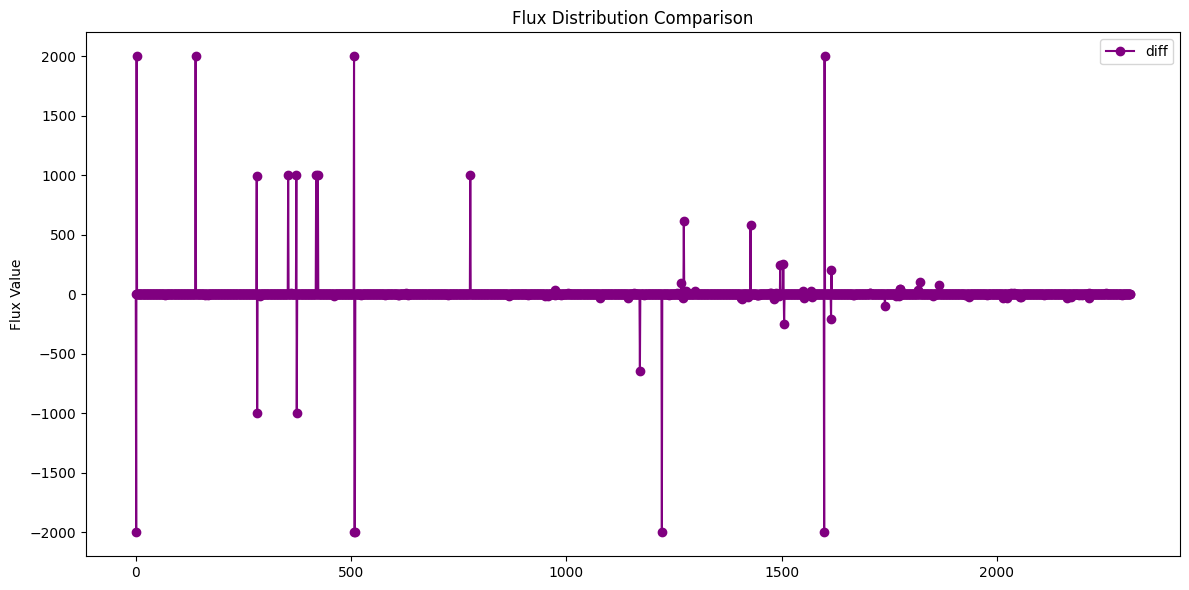

In [36]:



# Load data from Excel
file_path = "/Volumes/Mac Local/IITM/PhD/Coursework Sem 2/CSB/Project/Data.xlsx"

df = pd.read_excel(file_path,sheet_name ="Sheet4" )


plt.figure(figsize=(12, 6))

# Line plot for each diet

plt.plot(df['High fiber'] - df['Gluten free'], label='diff', marker='o', color='purple')

# Enhancing the plot
#plt.xticks(rotation=45, ha='right')
plt.ylabel('Flux Value')
plt.title('Flux Distribution Comparison')
plt.legend()
plt.tight_layout()
plt.show()